##  Perspectives in Computational Research: Homework 01

In [2]:
import random
import numpy
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
random.seed(1234)

### LOAD AND PROCESS DATA

In [6]:
#Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
#Preprocess the data by converting the data to a 2D tensor with individual values between 0 and 1
x_train_full = x_train.reshape((60000, 28*28))
x_train_full = x_train_full.astype('float32') / 255

x_test_2D = x_test.reshape((10000, 28*28))
x_test_final = x_test_2D.astype('float32')/ 255

y_train_full = to_categorical(y_train)
y_test_final = to_categorical(y_test)

In [8]:
#Randomly split the training data into 50,000 training observations and 10,000 validation observations
X_train, X_val, Y_train, Y_val = train_test_split(x_train_full, y_train_full, test_size=1/6, random_state=1234)

### INITIAL TEST

In [6]:
#Setup Model - 5 layers
model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Compile Model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
#Train Model and Track Accuracy
track = model.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.8693 - acc: 0.6836 - val_loss: 0.5758 - val_acc: 0.7556
Epoch 2/200
50000/50000 [==============================] - 6s 119us/step - loss: 0.5217 - acc: 0.8036 - val_loss: 0.4666 - val_acc: 0.8322
Epoch 3/200
50000/50000 [==============================] - 6s 117us/step - loss: 0.4368 - acc: 0.8356 - val_loss: 0.4066 - val_acc: 0.8488
Epoch 4/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.3891 - acc: 0.8552 - val_loss: 0.4518 - val_acc: 0.8367
Epoch 5/200
50000/50000 [==============================] - 7s 131us/step - loss: 0.3536 - acc: 0.8680 - val_loss: 0.5128 - val_acc: 0.8186
Epoch 6/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.3326 - acc: 0.8754 - val_loss: 0.4319 - val_acc: 0.8439
Epoch 7/200
50000/50000 [==============================] - 6s 124us/

50000/50000 [==============================] - 6s 118us/step - loss: 0.0779 - acc: 0.9763 - val_loss: 0.6796 - val_acc: 0.8944
Epoch 116/200
50000/50000 [==============================] - 6s 118us/step - loss: 0.0807 - acc: 0.9760 - val_loss: 0.6947 - val_acc: 0.9000
Epoch 117/200
50000/50000 [==============================] - 6s 119us/step - loss: 0.0716 - acc: 0.9770 - val_loss: 0.6997 - val_acc: 0.8949
Epoch 118/200
50000/50000 [==============================] - 6s 117us/step - loss: 0.0664 - acc: 0.9782 - val_loss: 0.7397 - val_acc: 0.8991
Epoch 119/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.0716 - acc: 0.9781 - val_loss: 0.6879 - val_acc: 0.8962
Epoch 120/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.0647 - acc: 0.9796 - val_loss: 0.7047 - val_acc: 0.8966
Epoch 121/200
50000/50000 [==============================] - 6s 118us/step - loss: 0.0735 - acc: 0.9778 - val_loss: 0.6486 - val_acc: 0.8939
Epoch 122/200
50000/50000 [

In [9]:
#Extract Accuracy and Loss from keras callback history
metrics = track.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)


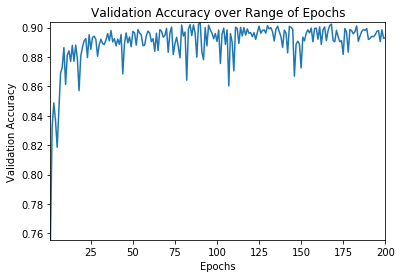

In [10]:
#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

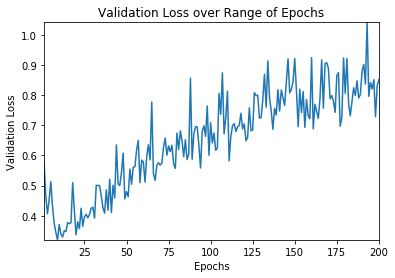

In [11]:
#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

Epoch where the model's performance degrades based on validation Set: After about 13 Epochs the loss increases and the the accuracy begins to decrease.


### IMPLEMENT DROPOUT

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 142us/step - loss: 0.9893 - acc: 0.6311 - val_loss: 0.5642 - val_acc: 0.7907
Epoch 2/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.5915 - acc: 0.7857 - val_loss: 0.4893 - val_acc: 0.8274
Epoch 3/200
50000/50000 [==============================] - 7s 138us/step - loss: 0.5179 - acc: 0.8128 - val_loss: 0.4457 - val_acc: 0.8308
Epoch 4/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.4775 - acc: 0.8303 - val_loss: 0.4329 - val_acc: 0.8438
Epoch 5/200
50000/50000 [==============================] - 7s 136us/step - loss: 0.4499 - acc: 0.8392 - val_loss: 0.4124 - val_acc: 0.8519
Epoch 6/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.4293 - acc: 0.8475 - val_loss: 0.4197 - val_acc: 0.8428
E

Epoch 57/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.2907 - acc: 0.9012 - val_loss: 0.3316 - val_acc: 0.8909
Epoch 58/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.2931 - acc: 0.9028 - val_loss: 0.3307 - val_acc: 0.8889
Epoch 59/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.2890 - acc: 0.9032 - val_loss: 0.3344 - val_acc: 0.8893
Epoch 60/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.2927 - acc: 0.9016 - val_loss: 0.3460 - val_acc: 0.8782
Epoch 61/200
50000/50000 [==============================] - 7s 138us/step - loss: 0.2900 - acc: 0.9030 - val_loss: 0.3415 - val_acc: 0.8869
Epoch 62/200
50000/50000 [==============================] - 7s 138us/step - loss: 0.2886 - acc: 0.9036 - val_loss: 0.3448 - val_acc: 0.8840
Epoch 63/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.2876 - acc: 0.9055 - val_loss: 0.3428 - val_acc: 0.8920
Epoch 64/200
50000/5

50000/50000 [==============================] - 7s 137us/step - loss: 0.3383 - acc: 0.9146 - val_loss: 0.4235 - val_acc: 0.8904
Epoch 174/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.3319 - acc: 0.9129 - val_loss: 0.4072 - val_acc: 0.8917
Epoch 175/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.3164 - acc: 0.9150 - val_loss: 0.4102 - val_acc: 0.8945
Epoch 176/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3401 - acc: 0.9133 - val_loss: 0.3994 - val_acc: 0.8923
Epoch 177/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3273 - acc: 0.9137 - val_loss: 0.4105 - val_acc: 0.8873
Epoch 178/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3278 - acc: 0.9140 - val_loss: 0.4329 - val_acc: 0.8920
Epoch 179/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3499 - acc: 0.9122 - val_loss: 0.4147 - val_acc: 0.8960
Epoch 180/200
50000/50000 [

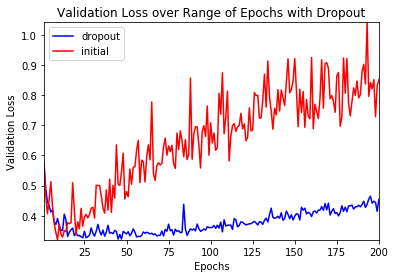

In [12]:
# Create Model with Dropout
model_w_dropout = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_w_dropout.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_dropout = model_w_dropout.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))

#Extract Accuracy and Loss from keras callback history
dropout_metrics = track_dropout.history
dropout_loss = dropout_metrics['val_loss']

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, dropout_loss, 'b', label = "dropout")
plt.plot(epochs, val_loss, 'r', label = "initial")
plt.margins(0)
plt.title("Validation Loss over Range of Epochs with Dropout")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

From the graph it is evident that between the initial model and the dropout model, the dropout model consistently performs better as the number of epochs increases.

### WEIGHT REGULARIZATION

In [13]:
# Model with L1 Regularization

model_L1 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l1(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l1(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l1(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l1(0.001)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_L1.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_L1 = model_L1.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 130us/step - loss: 14.7034 - acc: 0.5426 - val_loss: 4.1799 - val_acc: 0.6410
Epoch 2/200
50000/50000 [==============================] - 6s 123us/step - loss: 3.0833 - acc: 0.6513 - val_loss: 2.3541 - val_acc: 0.7074
Epoch 3/200
50000/50000 [==============================] - 6s 125us/step - loss: 2.1957 - acc: 0.6909 - val_loss: 2.0937 - val_acc: 0.7038
Epoch 4/200
50000/50000 [==============================] - 6s 125us/step - loss: 1.8989 - acc: 0.7275 - val_loss: 1.9951 - val_acc: 0.6339
Epoch 5/200
50000/50000 [==============================] - 6s 124us/step - loss: 1.7510 - acc: 0.7434 - val_loss: 1.7276 - val_acc: 0.7376
Epoch 6/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.6427 - acc: 0.7627 - val_loss: 1.6810 - val_acc: 0.7194
Epoch 7/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.5694 - acc: 0.7743 - val_loss: 1

50000/50000 [==============================] - 6s 122us/step - loss: 1.1644 - acc: 0.8499 - val_loss: 1.3175 - val_acc: 0.7949
Epoch 118/200
50000/50000 [==============================] - 6s 123us/step - loss: 1.1650 - acc: 0.8483 - val_loss: 1.1697 - val_acc: 0.8447
Epoch 119/200
50000/50000 [==============================] - 6s 125us/step - loss: 1.1644 - acc: 0.8483 - val_loss: 1.2481 - val_acc: 0.8197
Epoch 120/200
50000/50000 [==============================] - 6s 126us/step - loss: 1.1632 - acc: 0.8485 - val_loss: 1.2047 - val_acc: 0.8254
Epoch 121/200
50000/50000 [==============================] - 6s 123us/step - loss: 1.1620 - acc: 0.8483 - val_loss: 1.1666 - val_acc: 0.8463
Epoch 122/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.1634 - acc: 0.8481 - val_loss: 1.2169 - val_acc: 0.8291
Epoch 123/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.1593 - acc: 0.8503 - val_loss: 1.2370 - val_acc: 0.8212
Epoch 124/200
50000/50000 [

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 130us/step - loss: 2.2128 - acc: 0.6749 - val_loss: 1.6268 - val_acc: 0.7226
Epoch 2/200
50000/50000 [==============================] - 6s 124us/step - loss: 1.2209 - acc: 0.7878 - val_loss: 1.0145 - val_acc: 0.7994
Epoch 3/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.9159 - acc: 0.8124 - val_loss: 0.8336 - val_acc: 0.8161
Epoch 4/200
50000/50000 [==============================] - 6s 123us/step - loss: 0.7609 - acc: 0.8272 - val_loss: 0.9182 - val_acc: 0.7547
Epoch 5/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.6790 - acc: 0.8339 - val_loss: 0.6880 - val_acc: 0.8257
Epoch 6/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.6249 - acc: 0.8421 - val_loss: 0.6593 - val_acc: 0.8233
Epoch 7/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.5912 - acc: 0.8485 - val_loss: 0.

50000/50000 [==============================] - 6s 122us/step - loss: 0.3273 - acc: 0.9155 - val_loss: 0.4363 - val_acc: 0.8738
Epoch 118/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.3298 - acc: 0.9127 - val_loss: 0.5004 - val_acc: 0.8560
Epoch 119/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.3297 - acc: 0.9134 - val_loss: 0.4203 - val_acc: 0.8788
Epoch 120/200
50000/50000 [==============================] - 6s 124us/step - loss: 0.3290 - acc: 0.9143 - val_loss: 0.4806 - val_acc: 0.8572
Epoch 121/200
50000/50000 [==============================] - 6s 124us/step - loss: 0.3265 - acc: 0.9142 - val_loss: 0.4740 - val_acc: 0.8690
Epoch 122/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.3283 - acc: 0.9141 - val_loss: 0.5342 - val_acc: 0.8483
Epoch 123/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.3300 - acc: 0.9128 - val_loss: 0.4770 - val_acc: 0.8598
Epoch 124/200
50000/50000 [

NameError: name 'l1_loss' is not defined

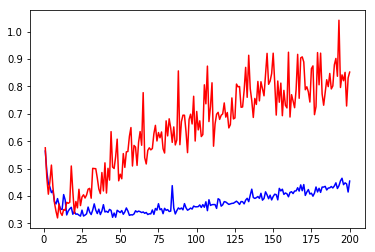

In [14]:
# Model with L2 Regularization
model_L2 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_L2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_L2 = model_L2.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))

#NOTE: Please Ignore the Error - graph with L1 and L2 is shown below. Did not want to rerun epochs.

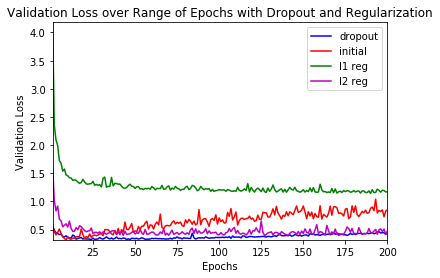

In [16]:
#Extract Validation Loss from keras callback history
L1_metrics = track_L1.history
L1_loss = L1_metrics['val_loss']

L2_metrics = track_L2.history
L2_loss = L2_metrics['val_loss']

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, dropout_loss, 'b', label = "dropout")
plt.plot(epochs, val_loss, 'r', label = "initial")
plt.plot(epochs, L1_loss, 'g', label = "l1 reg")
plt.plot(epochs, L2_loss, 'm', label = "l2 reg")
plt.margins(0)
plt.title("Validation Loss over Range of Epochs with Dropout and Regularization")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

### HYPERPARAMETER TUNING: 10 MODEL EVALUATION

In [15]:
#Alter the number of layers on batch size 256
# 3 Layers
model_layer3 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 5 Layers 
model_layer5 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 7 Layers
model_layer7 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_layer3.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_layer5.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_layer7.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_layer3 = model_layer3.fit(X_train, Y_train, batch_size = 256, epochs=200, validation_data = (X_val, Y_val))
track_layer5 = model_layer5.fit(X_train, Y_train, batch_size = 256, epochs=200, validation_data = (X_val, Y_val))
track_layer7 = model_layer7.fit(X_train, Y_train, batch_size = 256, epochs=200, validation_data = (X_val, Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 4s 77us/step - loss: 0.6339 - acc: 0.7767 - val_loss: 0.4856 - val_acc: 0.8203
Epoch 2/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.4129 - acc: 0.8477 - val_loss: 0.3978 - val_acc: 0.8498
Epoch 3/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.3562 - acc: 0.8673 - val_loss: 0.4341 - val_acc: 0.8412
Epoch 4/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.3270 - acc: 0.8783 - val_loss: 0.4366 - val_acc: 0.8355
Epoch 5/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.3002 - acc: 0.8882 - val_loss: 0.3763 - val_acc: 0.8644
Epoch 6/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.2811 - acc: 0.8950 - val_loss: 0.3723 - val_acc: 0.8622
Epoch 7/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.2685 - acc: 0.8984 - val_loss: 0.3352 - 

Epoch 118/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0559 - acc: 0.9824 - val_loss: 1.0155 - val_acc: 0.8863
Epoch 119/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0542 - acc: 0.9835 - val_loss: 1.1145 - val_acc: 0.8676
Epoch 120/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0558 - acc: 0.9836 - val_loss: 0.7818 - val_acc: 0.8958
Epoch 121/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0548 - acc: 0.9837 - val_loss: 0.8357 - val_acc: 0.8943
Epoch 122/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0553 - acc: 0.9836 - val_loss: 0.9906 - val_acc: 0.8856
Epoch 123/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0548 - acc: 0.9834 - val_loss: 0.8501 - val_acc: 0.8990
Epoch 124/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0537 - acc: 0.9838 - val_loss: 0.8380 - val_acc: 0.8974
Epoch 125/200
50000/

50000/50000 [==============================] - 6s 126us/step - loss: 0.1911 - acc: 0.9337 - val_loss: 0.4213 - val_acc: 0.8859
Epoch 35/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.1849 - acc: 0.9358 - val_loss: 0.4145 - val_acc: 0.8908
Epoch 36/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1826 - acc: 0.9357 - val_loss: 0.5882 - val_acc: 0.8743
Epoch 37/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1774 - acc: 0.9381 - val_loss: 0.4775 - val_acc: 0.8782
Epoch 38/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1816 - acc: 0.9376 - val_loss: 0.4441 - val_acc: 0.8831
Epoch 39/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1875 - acc: 0.9384 - val_loss: 0.4468 - val_acc: 0.8867
Epoch 40/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1799 - acc: 0.9399 - val_loss: 0.5613 - val_acc: 0.8786
Epoch 41/200
50000/50000 [=======

50000/50000 [==============================] - 6s 126us/step - loss: 0.1310 - acc: 0.9704 - val_loss: 0.7706 - val_acc: 0.8979
Epoch 151/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1157 - acc: 0.9731 - val_loss: 0.8169 - val_acc: 0.8824
Epoch 152/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1101 - acc: 0.9728 - val_loss: 0.8843 - val_acc: 0.8885
Epoch 153/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1043 - acc: 0.9741 - val_loss: 0.7981 - val_acc: 0.8967
Epoch 154/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0970 - acc: 0.9747 - val_loss: 0.7826 - val_acc: 0.8924
Epoch 155/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.0889 - acc: 0.9767 - val_loss: 0.7756 - val_acc: 0.8911
Epoch 156/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1040 - acc: 0.9744 - val_loss: 0.8423 - val_acc: 0.8861
Epoch 157/200
50000/50000 [

Epoch 8/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.3112 - acc: 0.8875 - val_loss: 0.4238 - val_acc: 0.8701
Epoch 9/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.3011 - acc: 0.8903 - val_loss: 0.3532 - val_acc: 0.8760
Epoch 10/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.3009 - acc: 0.8955 - val_loss: 0.3287 - val_acc: 0.8848
Epoch 11/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2838 - acc: 0.8982 - val_loss: 0.4667 - val_acc: 0.8524
Epoch 12/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2852 - acc: 0.8985 - val_loss: 0.4008 - val_acc: 0.8634
Epoch 13/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2775 - acc: 0.9019 - val_loss: 0.3713 - val_acc: 0.8804
Epoch 14/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2751 - acc: 0.9009 - val_loss: 0.4283 - val_acc: 0.8510
Epoch 15/200
50000/500

50000/50000 [==============================] - 9s 182us/step - loss: 0.1903 - acc: 0.9586 - val_loss: 0.9445 - val_acc: 0.8662
Epoch 125/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.2166 - acc: 0.9579 - val_loss: 0.9609 - val_acc: 0.8789
Epoch 126/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.2167 - acc: 0.9567 - val_loss: 0.6640 - val_acc: 0.8880
Epoch 127/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2120 - acc: 0.9580 - val_loss: 0.8648 - val_acc: 0.8855
Epoch 128/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.2055 - acc: 0.9567 - val_loss: 0.7997 - val_acc: 0.8852
Epoch 129/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.1981 - acc: 0.9602 - val_loss: 0.8235 - val_acc: 0.8935
Epoch 130/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.1980 - acc: 0.9592 - val_loss: 0.8297 - val_acc: 0.8944
Epoch 131/200
50000/50000 [

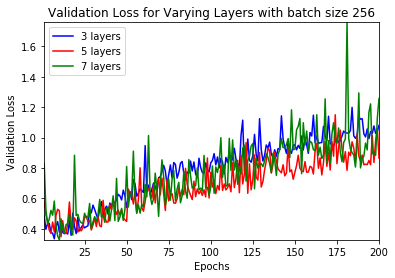

In [18]:
#Extract Validation Loss from keras callback history
layer3_metrics = track_layer3.history
layer3_loss = layer3_metrics['val_loss']

layer5_metrics = track_layer5.history
layer5_loss = layer5_metrics['val_loss']

layer7_metrics = track_layer7.history
layer7_loss = layer7_metrics['val_loss']

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, layer3_loss, 'b', label = "3 layers")
plt.plot(epochs, layer5_loss, 'r', label = "5 layers")
plt.plot(epochs, layer7_loss, 'g', label = "7 layers")
plt.margins(0)
plt.title("Validation Loss for Varying Layers with batch size 256")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [14]:
def best_estimate(metric_list):
    min_val = min(metric_list)
    best_iter = metric_list.index(min_val)
    return (min_val, best_iter + 1)

In [20]:
#Find Best Estimate of Each Model
(layer3_min, layer3_best) = best_estimate(layer3_loss)
(layer5_min, layer5_best) = best_estimate(layer5_loss)
(layer7_min, layer7_best) = best_estimate(layer7_loss)

print(layer3_min, layer5_min, layer7_min)

0.3352008804321289 0.34820260462760927 0.3286624517917633


Of the varying layers 3, 5, 7: the best model is made by 7 densely connected layers but it is interesting to note that that the estimate does not linerly get better. Thre is variation in the layers and depending on the number of epochs the optimal number of layers may change. 

In [9]:
#Varying Dropout Rate: constant 0.3, constant 0.8, varying from 0.9 - 0.4 between layers
model_DRpt3 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_DRpt8 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_DRvar = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dropout(0.9),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#Compile Model
model_DRpt3.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_DRpt8.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_DRvar.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_DRpt3 = model_DRpt3.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))
track_DRpt8 = model_DRpt8.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))
track_DRvar = model_DRvar.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 11s 213us/step - loss: 1.1687 - acc: 0.5699 - val_loss: 0.5985 - val_acc: 0.7764
Epoch 2/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.6209 - acc: 0.7734 - val_loss: 0.5818 - val_acc: 0.7962
Epoch 3/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.5185 - acc: 0.8120 - val_loss: 0.4457 - val_acc: 0.8346
Epoch 4/200
50000/50000 [==============================] - 10s 194us/step - loss: 0.4707 - acc: 0.8314 - val_loss: 0.4504 - val_acc: 0.8367
Epoch 5/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.4333 - acc: 0.8443 - val_loss: 0.4236 - val_acc: 0.8490
Epoch 6/200
50000/50000 [==============================] - 10s 194us/step - loss: 0.4089 - acc: 0.8532 - val_loss: 0.3928 - val_acc: 0.8509
Epoch 7/200
50000/50000 [==============================] - 10s

50000/50000 [==============================] - 10s 194us/step - loss: 0.4473 - acc: 0.8948 - val_loss: 0.3962 - val_acc: 0.8878
Epoch 58/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.4836 - acc: 0.8910 - val_loss: 0.3621 - val_acc: 0.8877
Epoch 59/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.4197 - acc: 0.8981 - val_loss: 0.3855 - val_acc: 0.8863
Epoch 60/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.4904 - acc: 0.8924 - val_loss: 0.3920 - val_acc: 0.8886
Epoch 61/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.4125 - acc: 0.8983 - val_loss: 0.4016 - val_acc: 0.8824
Epoch 62/200
50000/50000 [==============================] - 10s 194us/step - loss: 0.5575 - acc: 0.8889 - val_loss: 0.4959 - val_acc: 0.8756
Epoch 63/200
50000/50000 [==============================] - 10s 194us/step - loss: 0.5112 - acc: 0.8913 - val_loss: 0.4104 - val_acc: 0.8877
Epoch 64/200
50000/50000 [

50000/50000 [==============================] - 10s 194us/step - loss: 1.0838 - acc: 0.8575 - val_loss: 0.7603 - val_acc: 0.8690
Epoch 116/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.9756 - acc: 0.8675 - val_loss: 0.8425 - val_acc: 0.8635
Epoch 117/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.7840 - acc: 0.8772 - val_loss: 0.5740 - val_acc: 0.8792
Epoch 118/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.7771 - acc: 0.8796 - val_loss: 0.5259 - val_acc: 0.8843
Epoch 119/200
50000/50000 [==============================] - 10s 194us/step - loss: 0.6674 - acc: 0.8826 - val_loss: 0.5715 - val_acc: 0.8807
Epoch 120/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.8500 - acc: 0.8747 - val_loss: 0.6061 - val_acc: 0.8838
Epoch 121/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.8731 - acc: 0.8711 - val_loss: 0.6116 - val_acc: 0.8765
Epoch 122/200
50000/

Epoch 173/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.8158 - acc: 0.8139 - val_loss: 0.8998 - val_acc: 0.8629
Epoch 174/200
50000/50000 [==============================] - 10s 194us/step - loss: 1.3000 - acc: 0.8465 - val_loss: 0.7831 - val_acc: 0.8669
Epoch 175/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2067 - acc: 0.8538 - val_loss: 0.7187 - val_acc: 0.8713
Epoch 176/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1459 - acc: 0.8549 - val_loss: 0.7053 - val_acc: 0.8583
Epoch 177/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.3124 - acc: 0.8499 - val_loss: 0.7398 - val_acc: 0.8649
Epoch 178/200
50000/50000 [==============================] - 10s 194us/step - loss: 1.3901 - acc: 0.8419 - val_loss: 0.7110 - val_acc: 0.8594
Epoch 179/200
50000/50000 [==============================] - 10s 194us/step - loss: 1.3426 - acc: 0.8414 - val_loss: 0.7180 - val_acc: 0.8689
Epoch 

50000/50000 [==============================] - 10s 195us/step - loss: 1.2860 - acc: 0.4641 - val_loss: 2.9622 - val_acc: 0.1440
Epoch 31/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2863 - acc: 0.4692 - val_loss: 2.7759 - val_acc: 0.1887
Epoch 32/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2804 - acc: 0.4693 - val_loss: 2.7419 - val_acc: 0.1676
Epoch 33/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2836 - acc: 0.4745 - val_loss: 2.7518 - val_acc: 0.1282
Epoch 34/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2737 - acc: 0.4796 - val_loss: 2.6209 - val_acc: 0.1619
Epoch 35/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2535 - acc: 0.4837 - val_loss: 2.5351 - val_acc: 0.2010
Epoch 36/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2509 - acc: 0.4866 - val_loss: 2.4867 - val_acc: 0.2066
Epoch 37/200
50000/50000 [

50000/50000 [==============================] - 10s 194us/step - loss: 1.1724 - acc: 0.5717 - val_loss: 1.3893 - val_acc: 0.4926
Epoch 89/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1920 - acc: 0.5667 - val_loss: 1.4578 - val_acc: 0.4257
Epoch 90/200
50000/50000 [==============================] - 10s 194us/step - loss: 1.1777 - acc: 0.5716 - val_loss: 1.3968 - val_acc: 0.4387
Epoch 91/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1785 - acc: 0.5712 - val_loss: 1.3932 - val_acc: 0.4442
Epoch 92/200
50000/50000 [==============================] - 10s 194us/step - loss: 1.1756 - acc: 0.5734 - val_loss: 1.3635 - val_acc: 0.4606
Epoch 93/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1856 - acc: 0.5729 - val_loss: 1.3437 - val_acc: 0.4559
Epoch 94/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1848 - acc: 0.5730 - val_loss: 1.3239 - val_acc: 0.4752
Epoch 95/200
50000/50000 [

Epoch 146/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2496 - acc: 0.5809 - val_loss: 1.2190 - val_acc: 0.5382
Epoch 147/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2322 - acc: 0.5825 - val_loss: 1.2079 - val_acc: 0.5483
Epoch 148/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2305 - acc: 0.5865 - val_loss: 1.2145 - val_acc: 0.5370
Epoch 149/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2509 - acc: 0.5770 - val_loss: 1.1728 - val_acc: 0.5269
Epoch 150/200
50000/50000 [==============================] - 10s 194us/step - loss: 1.2767 - acc: 0.5736 - val_loss: 1.2302 - val_acc: 0.5400
Epoch 151/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2574 - acc: 0.5834 - val_loss: 1.1881 - val_acc: 0.5349
Epoch 152/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2458 - acc: 0.5799 - val_loss: 1.2056 - val_acc: 0.5339
Epoch 

50000/50000 [==============================] - 10s 195us/step - loss: 1.4169 - acc: 0.3893 - val_loss: 1.5540 - val_acc: 0.2689
Epoch 4/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.3071 - acc: 0.4465 - val_loss: 1.5566 - val_acc: 0.3164
Epoch 5/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.2167 - acc: 0.4927 - val_loss: 1.5635 - val_acc: 0.3303
Epoch 6/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1697 - acc: 0.5154 - val_loss: 1.6464 - val_acc: 0.3555
Epoch 7/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1348 - acc: 0.5285 - val_loss: 1.6107 - val_acc: 0.3257
Epoch 8/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1184 - acc: 0.5423 - val_loss: 1.6405 - val_acc: 0.3258
Epoch 9/200
50000/50000 [==============================] - 10s 194us/step - loss: 1.1028 - acc: 0.5429 - val_loss: 1.4504 - val_acc: 0.4017
Epoch 10/200
50000/50000 [======

50000/50000 [==============================] - 10s 195us/step - loss: 1.0088 - acc: 0.6103 - val_loss: 0.8712 - val_acc: 0.6444
Epoch 62/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.0263 - acc: 0.6109 - val_loss: 0.8689 - val_acc: 0.6382
Epoch 63/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.0158 - acc: 0.6116 - val_loss: 0.8564 - val_acc: 0.6462
Epoch 64/200
50000/50000 [==============================] - 10s 196us/step - loss: 1.0189 - acc: 0.6091 - val_loss: 0.8821 - val_acc: 0.6405
Epoch 65/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.0205 - acc: 0.6095 - val_loss: 0.8686 - val_acc: 0.6413
Epoch 66/200
50000/50000 [==============================] - 10s 194us/step - loss: 1.0300 - acc: 0.6064 - val_loss: 0.9415 - val_acc: 0.6027
Epoch 67/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.0205 - acc: 0.6065 - val_loss: 0.8617 - val_acc: 0.6349
Epoch 68/200
50000/50000 [

50000/50000 [==============================] - 10s 195us/step - loss: 1.1365 - acc: 0.6081 - val_loss: 0.8744 - val_acc: 0.6504
Epoch 120/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1343 - acc: 0.6063 - val_loss: 0.8896 - val_acc: 0.6354
Epoch 121/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1281 - acc: 0.6073 - val_loss: 0.8617 - val_acc: 0.6495
Epoch 122/200
50000/50000 [==============================] - 10s 194us/step - loss: 1.1168 - acc: 0.6068 - val_loss: 0.8944 - val_acc: 0.6429
Epoch 123/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1225 - acc: 0.6065 - val_loss: 0.8775 - val_acc: 0.6436
Epoch 124/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1248 - acc: 0.6055 - val_loss: 0.8969 - val_acc: 0.6383
Epoch 125/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.1037 - acc: 0.6052 - val_loss: 0.8628 - val_acc: 0.6456
Epoch 126/200
50000/

Epoch 177/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.3338 - acc: 0.5986 - val_loss: 0.8963 - val_acc: 0.6485
Epoch 178/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.3587 - acc: 0.5930 - val_loss: 0.8907 - val_acc: 0.6446
Epoch 179/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.3296 - acc: 0.5946 - val_loss: 0.9231 - val_acc: 0.6387
Epoch 180/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.3093 - acc: 0.5988 - val_loss: 0.9059 - val_acc: 0.6463
Epoch 181/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.3747 - acc: 0.5961 - val_loss: 0.8933 - val_acc: 0.6472
Epoch 182/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.4090 - acc: 0.5926 - val_loss: 0.9234 - val_acc: 0.6431
Epoch 183/200
50000/50000 [==============================] - 10s 195us/step - loss: 1.4202 - acc: 0.5955 - val_loss: 0.9063 - val_acc: 0.6468
Epoch 

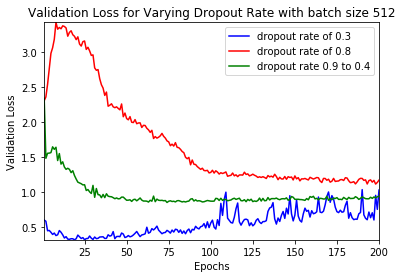

In [17]:
#Extract Validation Loss from keras callback history
epochs = numpy.arange(1, 200+1)

DRpt3_metrics = track_DRpt3.history
DRpt3_loss = DRpt3_metrics['val_loss']

DRpt8_metrics = track_DRpt8.history
DRpt8_loss = DRpt8_metrics['val_loss']

DRvar_metrics = track_DRvar.history
DRvar_loss = DRvar_metrics['val_loss']

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, DRpt3_loss, 'b', label = "dropout rate of 0.3")
plt.plot(epochs, DRpt8_loss, 'r', label = "dropout rate of 0.8")
plt.plot(epochs, DRvar_loss, 'g', label = "dropout rate 0.9 to 0.4")
plt.margins(0)
plt.title("Validation Loss for Varying Dropout Rate with batch size 512")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [16]:
#Find Best Estimate of Each Model
(pt3_min, pt3_best) = best_estimate(DRpt3_loss)
(pt8_min, pt8_best) = best_estimate(DRpt8_loss)
(var_min, var_best) = best_estimate(DRvar_loss)

print(pt3_min, pt8_min, var_min)

0.3161800070762634 1.1135554567337036 0.8503860054016114


Comparison: Of the threee models that vary the dropout rate by 0.5, 0.8 and range 0.9 to 0.4 on seven layered model with batch size 512 and epochs 200, the best performing model is one with dropout rate of 0.3. Even that increases after 100 epochs.

In [18]:
# Varying Epochs - 100, 300, 50 on Initial Model

model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile Model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_ep100 = model.fit(X_train, Y_train, batch_size = 512, epochs=100, validation_data = (X_val, Y_val))
track_ep300 = model.fit(X_train, Y_train, batch_size = 512, epochs=300, validation_data = (X_val, Y_val))
track_ep50 = model.fit(X_train, Y_train, batch_size = 512, epochs=50, validation_data = (X_val, Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.8608 - acc: 0.6788 - val_loss: 0.5715 - val_acc: 0.7788
Epoch 2/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.5099 - acc: 0.8125 - val_loss: 0.5290 - val_acc: 0.8134
Epoch 3/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.4334 - acc: 0.8409 - val_loss: 0.4266 - val_acc: 0.8476
Epoch 4/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.3895 - acc: 0.8548 - val_loss: 0.3683 - val_acc: 0.8604
Epoch 5/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.3503 - acc: 0.8705 - val_loss: 0.4332 - val_acc: 0.8432
Epoch 6/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.3275 - acc: 0.8784 - val_loss: 0.3402 - val_acc: 0.8696
Epoch 7/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.3070 - acc: 0.8848 - val_loss: 0.

50000/50000 [==============================] - 6s 116us/step - loss: 0.1074 - acc: 0.9624 - val_loss: 0.6608 - val_acc: 0.8735
Epoch 60/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.1122 - acc: 0.9607 - val_loss: 0.5742 - val_acc: 0.8928
Epoch 61/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.1130 - acc: 0.9625 - val_loss: 0.6767 - val_acc: 0.8867
Epoch 62/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.1084 - acc: 0.9619 - val_loss: 0.4956 - val_acc: 0.8935
Epoch 63/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.1009 - acc: 0.9631 - val_loss: 0.6042 - val_acc: 0.8983
Epoch 64/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.1088 - acc: 0.9631 - val_loss: 0.5833 - val_acc: 0.8991
Epoch 65/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.1082 - acc: 0.9630 - val_loss: 0.6198 - val_acc: 0.8956
Epoch 66/100
50000/50000 [=======

50000/50000 [==============================] - 6s 116us/step - loss: 0.0692 - acc: 0.9784 - val_loss: 0.7511 - val_acc: 0.8983
Epoch 18/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0835 - acc: 0.9762 - val_loss: 0.8046 - val_acc: 0.8916
Epoch 19/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0672 - acc: 0.9784 - val_loss: 0.7757 - val_acc: 0.9016
Epoch 20/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0750 - acc: 0.9792 - val_loss: 0.6702 - val_acc: 0.8952
Epoch 21/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0676 - acc: 0.9784 - val_loss: 0.7870 - val_acc: 0.8940
Epoch 22/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0906 - acc: 0.9753 - val_loss: 0.6438 - val_acc: 0.8956
Epoch 23/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0835 - acc: 0.9779 - val_loss: 0.6940 - val_acc: 0.8969
Epoch 24/300
50000/50000 [=======

50000/50000 [==============================] - 6s 116us/step - loss: 0.0637 - acc: 0.9845 - val_loss: 0.8886 - val_acc: 0.8946
Epoch 76/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0650 - acc: 0.9828 - val_loss: 0.9118 - val_acc: 0.8878
Epoch 77/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0621 - acc: 0.9856 - val_loss: 0.9002 - val_acc: 0.8966
Epoch 78/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0801 - acc: 0.9826 - val_loss: 0.7855 - val_acc: 0.8999
Epoch 79/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0629 - acc: 0.9855 - val_loss: 0.8079 - val_acc: 0.8961
Epoch 80/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0707 - acc: 0.9849 - val_loss: 0.8471 - val_acc: 0.8964
Epoch 81/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0665 - acc: 0.9851 - val_loss: 0.8700 - val_acc: 0.8968
Epoch 82/300
50000/50000 [=======

50000/50000 [==============================] - 6s 117us/step - loss: 0.0675 - acc: 0.9870 - val_loss: 0.8755 - val_acc: 0.8902
Epoch 134/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0657 - acc: 0.9862 - val_loss: 0.8109 - val_acc: 0.8970
Epoch 135/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0525 - acc: 0.9883 - val_loss: 0.8833 - val_acc: 0.8981
Epoch 136/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0563 - acc: 0.9876 - val_loss: 0.9205 - val_acc: 0.8965
Epoch 137/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0493 - acc: 0.9876 - val_loss: 1.1200 - val_acc: 0.8824
Epoch 138/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0577 - acc: 0.9867 - val_loss: 0.8198 - val_acc: 0.8935
Epoch 139/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0467 - acc: 0.9899 - val_loss: 0.9986 - val_acc: 0.8843
Epoch 140/300
50000/50000 [

50000/50000 [==============================] - 6s 116us/step - loss: 0.0585 - acc: 0.9891 - val_loss: 0.9292 - val_acc: 0.9002
Epoch 192/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0565 - acc: 0.9887 - val_loss: 1.0051 - val_acc: 0.8959
Epoch 193/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0522 - acc: 0.9888 - val_loss: 0.9273 - val_acc: 0.8929
Epoch 194/300
50000/50000 [==============================] - 6s 117us/step - loss: 0.0498 - acc: 0.9902 - val_loss: 1.0261 - val_acc: 0.8902
Epoch 195/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0684 - acc: 0.9882 - val_loss: 0.9656 - val_acc: 0.8961
Epoch 196/300
50000/50000 [==============================] - 6s 117us/step - loss: 0.0517 - acc: 0.9897 - val_loss: 0.9539 - val_acc: 0.8915
Epoch 197/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0530 - acc: 0.9902 - val_loss: 0.9612 - val_acc: 0.8969
Epoch 198/300
50000/50000 [

50000/50000 [==============================] - 6s 116us/step - loss: 0.0533 - acc: 0.9906 - val_loss: 1.1021 - val_acc: 0.8755
Epoch 250/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0575 - acc: 0.9900 - val_loss: 1.0222 - val_acc: 0.8936
Epoch 251/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0430 - acc: 0.9917 - val_loss: 1.1415 - val_acc: 0.8944
Epoch 252/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0754 - acc: 0.9884 - val_loss: 1.0836 - val_acc: 0.8846
Epoch 253/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0473 - acc: 0.9920 - val_loss: 1.0625 - val_acc: 0.8934
Epoch 254/300
50000/50000 [==============================] - 6s 116us/step - loss: 0.0519 - acc: 0.9905 - val_loss: 1.0184 - val_acc: 0.8919
Epoch 255/300
50000/50000 [==============================] - 6s 117us/step - loss: 0.0443 - acc: 0.9913 - val_loss: 1.1466 - val_acc: 0.8929
Epoch 256/300
50000/50000 [

Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.0454 - acc: 0.9914 - val_loss: 0.9878 - val_acc: 0.8993
Epoch 8/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.0499 - acc: 0.9915 - val_loss: 0.9091 - val_acc: 0.8966
Epoch 9/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.0583 - acc: 0.9906 - val_loss: 0.9040 - val_acc: 0.8939
Epoch 10/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.0500 - acc: 0.9917 - val_loss: 1.0142 - val_acc: 0.8971
Epoch 11/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.0622 - acc: 0.9914 - val_loss: 0.9748 - val_acc: 0.8974
Epoch 12/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.0634 - acc: 0.9908 - val_loss: 1.0220 - val_acc: 0.8924
Epoch 13/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.0548 - acc: 0.9915 - val_loss: 1.1179 - val_acc: 0.8946
Epoch 14/50
50000/50000 [=====

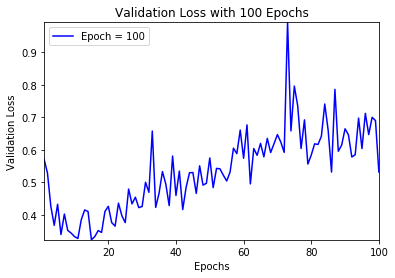

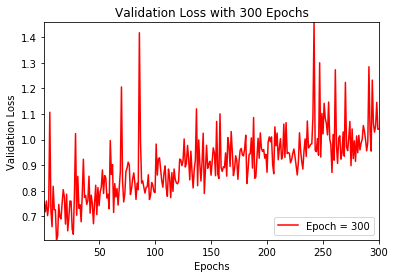

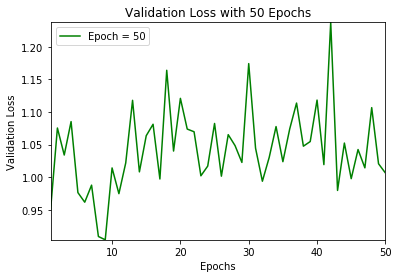

In [20]:
#Extract Accuracy and Loss from keras callback history
ep100_metrics = track_ep100.history
ep100_loss = ep100_metrics['val_loss']
epochs_100 = numpy.arange(1, len(ep100_loss)+1)

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs_100, ep100_loss, 'b', label = "Epoch = 100")
plt.margins(0)
plt.title("Validation Loss with 100 Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

ep300_metrics = track_ep300.history
ep300_loss = ep300_metrics['val_loss']
epochs_300 = numpy.arange(1, len(ep300_loss)+1)

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs_300, ep300_loss, 'r', label = "Epoch = 300")
plt.margins(0)
plt.title("Validation Loss with 300 Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

ep50_metrics = track_ep50.history
ep50_loss = ep50_metrics['val_loss']
epochs_50 = numpy.arange(1, len(ep50_loss)+1)

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs_50, ep50_loss, 'g', label = "Epoch = 50")
plt.margins(0)
plt.title("Validation Loss with 50 Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()


In [21]:
#Find Best Estimate of Each Model
(ep100_min, ep100_best) = best_estimate(ep100_loss)
(ep300_min, ep300_best) = best_estimate(ep300_loss)
(ep50_min, ep50_best) = best_estimate(ep50_loss)

print(ep100_min, ep300_min, ep50_min)

0.3239537215948105 0.6087193402290344 0.9040269436836242


Based on the epochs varied on the initial model, it can be seen that 100 epochs is optimum. Too many or too little have higher losses for validation set. 

In [22]:
#Adding Weight - L2 with lower number of epochs
model_L2e = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_L2e.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_L2e = model_L2e.fit(X_train, Y_train, batch_size = 512, epochs=100, validation_data = (X_val, Y_val))


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 135us/step - loss: 2.2120 - acc: 0.6621 - val_loss: 1.4629 - val_acc: 0.7703
Epoch 2/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.2267 - acc: 0.7879 - val_loss: 0.9958 - val_acc: 0.8190
Epoch 3/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.9144 - acc: 0.8096 - val_loss: 1.0279 - val_acc: 0.7548
Epoch 4/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.7720 - acc: 0.8249 - val_loss: 0.6823 - val_acc: 0.8416
Epoch 5/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.6684 - acc: 0.8380 - val_loss: 0.7352 - val_acc: 0.8062
Epoch 6/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.6240 - acc: 0.8439 - val_loss: 0.5781 - val_acc: 0.8517
Epoch 7/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.5927 - acc: 0.8443 - val_loss: 0.

50000/50000 [==============================] - 6s 122us/step - loss: 0.3542 - acc: 0.9029 - val_loss: 0.4206 - val_acc: 0.8801
Epoch 60/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.3588 - acc: 0.9019 - val_loss: 0.4187 - val_acc: 0.8799
Epoch 61/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.3524 - acc: 0.9042 - val_loss: 0.4102 - val_acc: 0.8854
Epoch 62/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.3578 - acc: 0.9015 - val_loss: 0.4229 - val_acc: 0.8805
Epoch 63/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.3500 - acc: 0.9046 - val_loss: 0.4218 - val_acc: 0.8805
Epoch 64/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.3539 - acc: 0.9033 - val_loss: 0.4356 - val_acc: 0.8729
Epoch 65/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.3510 - acc: 0.9036 - val_loss: 0.4464 - val_acc: 0.8674
Epoch 66/100
50000/50000 [=======

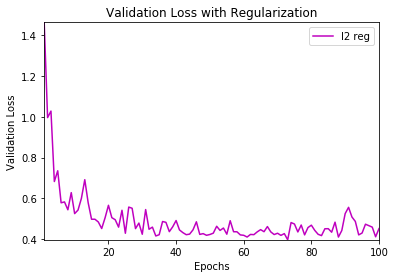

In [23]:
#Extract Validation Loss from keras callback history
L2e_metrics = track_L2e.history
L2e_loss = L2e_metrics['val_loss']

epochs_100 = numpy.arange(1, len(ep100_loss)+1)

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs_100, L2e_loss, 'm', label = "l2 reg")
plt.margins(0)
plt.title("Validation Loss with Regularization")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [25]:
#Find Best Estimate of Each Model
(L2e_min, L2e_best) = best_estimate(L2e_loss)
print(L2e_min)

0.39659810223579406


### FINAL MODEL

The 10 alternate models were compared by varying epoch, layers, changing dropout and adding weight. The best model was 5 layer model with 0.3 dropout with 0.31 loss for the best estimate. The batch size is 512 and epoch is 100.

In [28]:

model_final = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_final.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_final = model_final.fit(x_train_full, y_train_full, batch_size = 512, epochs=100)


Epoch 1/100
60000/60000 [==============================] - 12s 199us/step - loss: 1.0696 - acc: 0.5991
Epoch 2/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.5855 - acc: 0.7847
Epoch 3/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.5028 - acc: 0.8225
Epoch 4/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.4556 - acc: 0.8351
Epoch 5/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.4186 - acc: 0.8478
Epoch 6/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.3987 - acc: 0.8569
Epoch 7/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.3851 - acc: 0.8640
Epoch 8/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.3731 - acc: 0.8667
Epoch 9/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.3574 - acc: 0.8727
Epoch 10/100
60000/60000 [==============================] - 11s 186us/ste

60000/60000 [==============================] - 11s 185us/step - loss: 0.6284 - acc: 0.8804
Epoch 80/100
60000/60000 [==============================] - 11s 186us/step - loss: 0.4122 - acc: 0.8942
Epoch 81/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.4406 - acc: 0.8926
Epoch 82/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.4557 - acc: 0.8919
Epoch 83/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.5143 - acc: 0.8901
Epoch 84/100
60000/60000 [==============================] - 11s 186us/step - loss: 0.6000 - acc: 0.8828
Epoch 85/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.5738 - acc: 0.8851
Epoch 86/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.7430 - acc: 0.8740
Epoch 87/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.7031 - acc: 0.8768
Epoch 88/100
60000/60000 [==============================] - 11s 185us/step - 

In [30]:
#Evaluate Best Model
model_final.evaluate(x_test_final, y_test_final)

10000/10000 [==============================] - 1s 125us/step


[0.659788136458397, 0.8644]

On Testset, this model has evalualaed 0.659 loss and 0.86 accuracy. This is not as good as the performance on the validation set.   

However, compared to other models, this model does well as there is dropout between layers to account for noise but not a high fraction so most of the data is still used. The epoch is reduced to 100 as it performs well and is not computationally expensive.  